<font size=18>Lesson 10 Homework - Simulation</font>

## **Question 1** - Textbook Problem 20.1-2 (Manually Graded) <font color="magenta">(5 points)</font>

The weather can be considered a stochastic system, because it evolves in a probabilistic manner from one day to the next. Suppose for a certain location that this probabilistic series satisfies the following description:

The probability of rain tomorrow is 0.6 if it is raining today. The probability of its being clear (no rain) tomorrow is 0.8 if it is clear today.

We've modified the problem a bit from the text book:  use uniformly distributed random numbers to simulate a sequence of 1000 days starting from a clear day.  Your code should output the the approximate probability of a rainy day based on your simulation results.

**Hints:**
* use a for loop
* start with a clear day
* inside the for loop, if today is clear and rand() < .8, then tomorrow is clear, otherwise tomorrow is rainy
* count the number of rainy days/simulation size to estimate the probability of rain
* round to 2 digits to compare your answer to the answer choices
* even with a random seed, there could be some variance. Choose the closest answer to what you got.  
* You can increase the number of simulated days to be more certain of your answer.

In [1]:
import numpy as np

clear = True
rainy = 0

# retain this seed
np.random.seed(10)

for day in range(1000):
	prob = np.random.uniform()
	if not clear:
		if prob < .6:
			rainy += 1
			continue
		else:
			clear = True
	else:
		if prob < .8:
			continue
		else:
			clear = False
			rainy += 1

print(round(rainy/1000, 2))

0.32


## **Question 2** <font color="magenta">(2 points)</font>

What is the approximate probability of rain?

* .78
* .33
* .59
* .01
* .99

## **Question 3** - Textbook Problem 20.6-7 (Manually Graded) <font color="magenta">(5 points)</font>

Now that Jennifer is in middle school, her parents have decided that they really must start saving for her college education. They have \$10,000 to invest right now. Furthermore, they plan to save another \$4,000 each year until Jennifer starts college five years from now. They plan to split their investment evenly between a stock fund and a bond fund. Historically, the stock fund has had an average annual return of 8 percent with a standard deviation of 6 percent. The bond fund has had an average annual return of 4 percent with a standard deviation of 3 percent. (Assume a normal distribution for both.)

Assume that the initial investment (\$10,000) is made right now (year 0) and is split evenly between the two funds (i.e., \$5,000 in each fund). The returns of each fund are allowed to accumulate (i.e., are reinvested) in the same fund and no redistribution will be done before Jennifer starts college. Furthermore, four additional investments of \$4,000 will be made and split evenly between both funds (\$2,000 each) at the end of year 1, year 2, year 3, and year 4, plus another \$4,000 of savings will be available at the end of year 5, just in time for Jennifer to begin college. Use a 1000-trial simulation to answer questions 4-7.

**Hints:**
* Generate new interest rates randomly each year.
* Store the total amount after each simulation (stocks + bonds).
* To determine probability of the fund being at least 35k, count the number of times the fund reached 35k or more and divide by sim size.
* Don't forget to add the \$2000 to each of the stocks and bonds at the end of year 5.
* Easiest implementation is a for loop. 
* Remember to round at the end, as per each question's instructions.
* You can increase the number of simulated days to be more certain of your answer.
* To check your work, you could set the interest rate for the stocks to a constant 0.08 and see if you get \$19,079.84 at the end of the 5th year as demonstrated by this code snippet:

```python
A = 5000 # initial investment
r = .08 # annual interest rate
n = 5 # number of years
I = 2000 # additional investment at end of year year
print("end of year, amount")
for i in range(n):
    A = (1+r)*A + I
    print(i+1,A)
```

In [2]:
sim_size = 1000
cutoff = 35000
n = 5 # number of years
I = 2000 # additional investment at end of each year

np.random.seed(777)  # Retain this seed

A = []
tracker = 0

for s in range(sim_size):
	# two accounts with different interest rates require 2 variables
	A_s = 5000
	A_b = 5000
	r_s = .08 # annual interest rates
	r_b = .04
	
	for i in range(n):
		A_s = (1+r_s)*A_s + I
		A_b = (1+r_b)*A_b + I

		# generate new interest rates
		r_s = np.random.normal(loc=.08, scale=.06)
		r_b = np.random.normal(loc=.04, scale=.03)

	A.append(A_s+A_b)
	if (A_s+A_b) > cutoff:
		tracker += 1

print(tracker/sim_size)
print(np.mean(A))
print(np.std(A))

0.722
36073.853082579626
1737.5304369243768


## **Question 4** <font color="magenta">(2 points)</font>

What will be the expected value (mean) of the college fund at the end of year 5, rounded to the nearest 1000?


## **Question 5** <font color="magenta">(2 points)</font>
What will be the standard deviation of the college fund at the end of year 5, rounded to the nearest 1000?



## **Question 6** <font color="magenta">(2 points)</font>
What is the probability that the college fund at the end of year 5 will be at least \$35,000?

* .7
* .5
* .3
* .9
* .1

## **Question 7** <font color="magenta">(2 points)</font>
What is the probability that the college fund at the end of year 5 will be at least \$40,000, rounded to two digits?

* .55
* .09
* .01
* .35
* .77


## **Question 8** - Textbook Problem 20.6-9 (Manually Graded) <font color="magenta">(5 points)</font>

Road Pavers, Inc. \(RPI\) is considering bidding on a county road construction project. RPI has estimated that the cost of this particular project would be $5 million. In addition, the cost of putting together a bid is estimated to be $50,000. The county also will receive four other bids on the project from competitors of RPI. Past experience with these competitors suggests that each competitor’s bid is most likely to be 20 percent over the project cost of $5 million, but could be as low as 5 percent over or as much as 40 percent over this cost. Assume a triangular distribution for each of these bids.

Suppose that RPI bids \$5.7 million on the project. Write a function that takes in RPI's bid and the simulation size and returns an array of profits.

Run your function with a simulation size of 1,000 trials. (You should _call_ your function once. It should simulate profits 1000 times and return an array of profits.

**Hints:**

* RPI's bid is constant, but that constant changes for some of the questions
* Generate 4 bids from triangular dist with low = 5 * 1.05, mode = 5 * 1.2, high = 5 * 1.4.
* Compare RPI's bid to the lowest (min) of the 4 competitor bids.
* If RPI bid < smallest bid then RPI wins and their profit is RPI bid - (5 + .05).
* If RPI loses their profit is -.05.
* Each round of the simulation track their profit, or tracks wins and losses.
* Compute statistics.
* You can increase the number of simulated days to be more certain of your answer.



In [3]:
def find_profits(bid, ssize):
	'''
	Parameters:
	bid - the amount RPI is bidding
	ssize - the simulation size (1000 for your final solution - start smaller until you have a working function)

	Returns:
	A numpy array of profits
	'''
	np.random.seed(88) #retain this seed
	
	total_cost = 5
	prob_cost = -.05
	rpi_profits = []
	rpi_wins = 0
	
	for i in range(ssize):
		comp_bids = np.random.triangular(left=5*1.05, mode=5*1.2, right=5*1.4, size=4)
		min_comp_bid = comp_bids.min()
		if bid < min_comp_bid:
			rpi_profits.append(bid - total_cost + prob_cost)
			rpi_wins += 1
		else:
			rpi_profits.append(prob_cost)
			
	return(rpi_profits, rpi_wins)
	
rpi_profits, n_wins = find_profits(5.7, 1000)
print(f'RPI average profit: {round(np.mean(rpi_profits)*1000000, 2)}')
print(f'Probability RPI wins: {n_wins/1000}')

RPI average profit: 298600.0
Probability RPI wins: 0.498


## **Question 9** <font color="magenta">(2 points)</font>

What is the probability that RPI will win the bid, rounded to the nearest single digit? 

* .1
* .3
* .5
* .7
* .9

## **Question 10** <font color="magenta">(2 points)</font>

Into which range would RPI's average profit fall?

* 150,000 - 199,99
* 200,000 - 229,999
* 230,000 - 269,999
* 270,000 - 315,999
* 316,000 - 329,999



## **Question 11**  <font color="magenta">(2 points)</font>

Generate a parameter analysis report to consider eight equally spaced bids between \$5.3 million and \$6 million in order to forecast RPI’s mean profit for each bid. Which of these bid ranges maximizes RPI’s mean profit?

**Hints:**
* Repeat the steps from question 8, with each of the possible bids passed in to your function.
* Find average profit for each possible bid.
* For which of the bids is average profit maximized?


**Answer Options:**
* 5.3 or 5.4
* 5.5 or 5.6
* 5.7 or 5.8
* 5.9 or 6.0


In [4]:
import pandas as pd

bids = np.linspace(5.3, 6, 8)
ssize = 1000
results = pd.DataFrame(columns=['AvgProfit', 'WinRatio'], index=bids)

np.random.seed(88) #retain this seed

for i in bids:
	rpi_profits, n_wins = find_profits(i, ssize)
	results.loc[i, 'AvgProfit'] = round(np.mean(rpi_profits), 2)
	results.loc[i, 'WinRatio'] = n_wins/ssize
	results.loc[i, 'Pctl_05'], results.loc[i, 'Pctl_95'] = np.quantile(rpi_profits, [.05, .95])
	
results = results.rename_axis('Bid').reset_index().astype(float)
results

,Bid,AvgProfit,WinRatio,Pctl_05,Pctl_95
0,5.3,0.25,0.986,0.25,0.25
1,5.4,0.32,0.923,-0.05,0.35
2,5.5,0.35,0.798,-0.05,0.45
3,5.6,0.35,0.664,-0.05,0.55
4,5.7,0.30,0.498,-0.05,0.65
5,5.8,0.22,0.343,-0.05,0.75
6,5.9,0.15,0.225,-0.05,0.85
7,6.0,0.06,0.108,-0.05,0.95


## **Question 12** (Manually Graded) <font color="magenta">(2 points)</font>

Generate a trend chart for the eight bids considered in Question 11.

Submit both your code and your trend chart.

**Hints:**
* Graph horizontal bid amount and vertical mean profit
* Remember to add trend lines


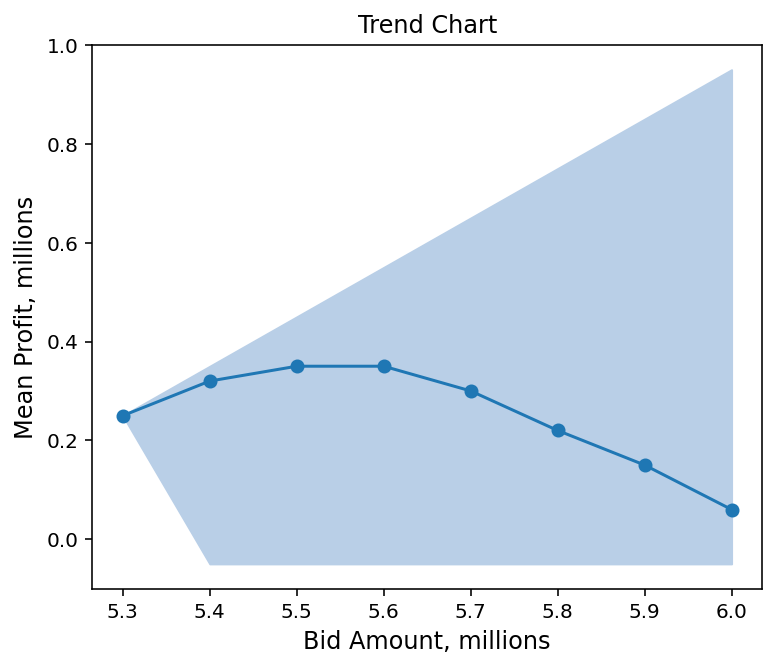

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))
ax.plot('Bid','AvgProfit',data=results, linestyle='-', marker='o')
plt.xlabel('Bid Amount, millions', fontsize=12)
plt.ylabel('Mean Profit, millions', fontsize=12)
plt.title("Trend Chart")
ax.fill_between('Bid','Pctl_05','Pctl_95',data=results,color="#b9cfe7", edgecolor="#b9cfe7")

## **Question 13**  (Manually Graded) <font color="magenta">(4 points)</font>

Perform an automated search to find the bid that maximizes RPI’s mean profit. You should consider bids in the range of 5.3 to 6 million. (Use one of the optimization tools we've studied.)


In [6]:
from scipy.optimize import minimize_scalar

def neg_mean_profit(bid):
	rpi_profits = find_profits(bid, 1000)[0]
	return(-np.mean(rpi_profits)) # simulate stats and return just mean

result = minimize_scalar(neg_mean_profit, bounds=[5.3,6], method='bounded')

# summarize results
print(f'The maximum average profit is approximately {-result["fun"]*1000000:.2f}')
print(f"The optimal bid is approximately {result['x']:.3f} million")

The maximum average profit is approximately 357179.96
The optimal bid is approximately 5.555 million


## Sausage Making \- Simulation with Optimization



We're going to revisit the Sausage Factory problem from Lessons 1 and 2, but this time, we'  
re going to introduce uncertainty.

In Lesson 2, we optimized the cost of our sausage making, by altering the ingredients in each sausage type to meet minimum requirements and fulfill a demand of 350 economy sausages and 500 premium sausages a week.

In reality, our demand fluctuates week to week. 

The basic set up of the problem is the same.

We're going to make sausages by blending pork, wheat, and starch.  Our objective is to minimize the cost of making the sausages.  The table below shows the ingredients available, the cost, and the amount of each ingredient available from our supplier:

Ingredient | Cost ($/kg) | Amount (kg)
-----------|------|--------------
Pork       | 4.32 | 7 kg
Wheat      | 2.46 | 20.0
Starch     | 1.86 | 17

We want to make 2 types of sausage:

* Economy ( > 40\% pork )
* Premium ( > 60\% pork )

Each sausage is 50 grams (0.05 kg).  

According to government regulations, the most starch we can use in our sausages is 25\% by weight.



**New Information:**

The price for pre-purchased pork is \$3.10, for a discount of \$1.22 per kg. We will be fairly conservative in our estimates of pre-purchase, and we are setting our minimum pork used to our pre-purchased amount, so we will only need to calculate the total discount in our objective, not a penalty for buying full-priced pork at \$4.32 per kg.  

While our demand fluctuates, we know that our demand for economy sausages is between 325 and 375 each week and our demand for premium sausage is between 450 and 550 each week. Demand appears to be uniformly distributed (use `np.random.randint`).

***This is a prescriptive analytics problem!  You are prescribing the amount of pork to buy under contract to minimize future cost in an uncertain future.***

## **Question 14** (Manually Graded) <font color="magenta">(4 points)</font>

Write a function that takes in the amount of discount pork we will pre-purchase as a variable (x). 

Inside the function, write a 1000 iteration loop that solves the optimization problem with random variables for demand and x as your stand in for the minimum amount of discount pork produced. Track the amount of full-price pork used and the cost of each iteration and return both from your function.  

You may base your Pyomo model on either the concrete or abstract formulations in Lesson 1 and Lesson 2 presentations, respectively.

After you've written your function, test it using 20 as the amount of discount pork purchased. Plot histograms of the Kilograms of Full-Price Pork purchased and the cost.

Submit both your code and the two histograms in Canvas.

**Hints:**
* You need to write the LP in terms of this variable x
* Put the whole LP inside a function
* Account for the discount by subtracting 1.22*x from the objective
* x is like the 23 kg in the original model
* x + 7 is the max amount of pork you can use
* Inside the function you have a loop around the LP that repeats the solution 1000 times, each time with diff. random demands.
* Track the kg of full-priced pork, and the minimized cost.
* Return the kg of full-priced pork and the minimized cost as numpy arrays.

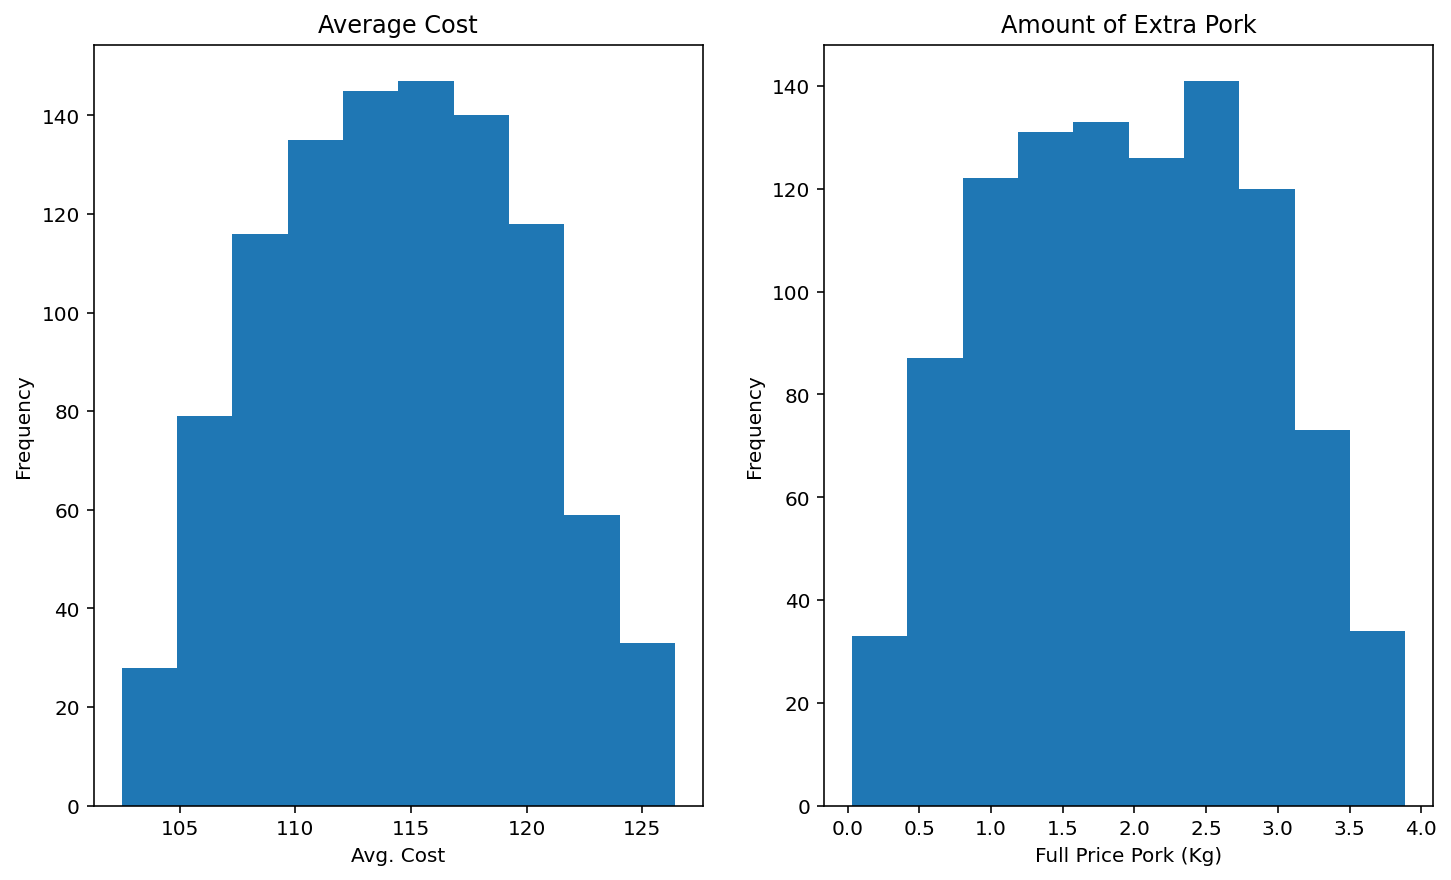

In [7]:
from pyomo.environ import *

def get_pork_cost(x):
	'''
	Parameters:
	x - the amount of discount pork purchased

	Returns:
	finalCost: An array of the optimized costs
	fullPricePorkUsed: An array of the total full-price pork used
	'''
	np.random.seed(814) #retain this seed
	ssize = 1000
	var_economy_demand = np.random.randint(low=325, high=376, size=ssize)
	var_premium_demand = np.random.randint(low=450, high=550, size=ssize)
	
	
	types = ['economy','premium']
	ingredients = ['pork', 'wheat', 'starch']

	cost = dict( zip( ingredients, [4.32, 2.46, 1.86] ) )

	kg_per_sausage = 0.05

	mnpi = [[.4,.6],[0,0],[0,0]] # min proportions
	min_prop_ing = { ingredients[i]:{ types[j]:mnpi[i][j] for j in range(len(types)) } for i in range(len(ingredients)) }
	mxpi = [[1,1],[1,1],[.25,.25]] # max proportions
	max_prop_ing = { ingredients[i]:{ types[j]:mxpi[i][j] for j in range(len(types)) } for i in range(len(ingredients)) }

	max_ingredient = dict( zip( ingredients, [x+7, 20, 17] ) )
	min_ingredient = dict( zip( ingredients, [x,  0,  0] ) )

	full_price_pork = []
	min_cost = []
	
	for s in range(ssize):
		# generate demand

		number_each_type = dict( zip( types, [var_economy_demand[s], var_premium_demand[s]] ) )

		### Pyomo Model ###

		# Concrete Model
		M = ConcreteModel(name = "Sausages")

		# Decision Variables
		M.amount = Var(ingredients, types, domain = NonNegativeReals)

		# Objective
		M.cost = Objective( expr = sum( cost[i] * sum(M.amount[i,t] for t in types) 
									   for i in ingredients)-1.22*x, sense = minimize )

		M.tot_sausages_ct = ConstraintList()
		for t in types:
			M.tot_sausages_ct.add( sum( M.amount[i,t] for i in ingredients ) 
								 == kg_per_sausage * number_each_type[t] )

		M.min_prop_ct = ConstraintList()
		for i in ingredients:
			for t in types:
				M.min_prop_ct.add( M.amount[i,t] >= min_prop_ing[i][t] *
								 sum( M.amount[k,t] for k in ingredients ) )

		M.max_prop_ct = ConstraintList()
		for i in ingredients:
			for t in types:
				M.max_prop_ct.add( M.amount[i,t] <= max_prop_ing[i][t] * 
								 sum( M.amount[k, t] for k in ingredients ) )

		M.max_ingredient_ct = ConstraintList()
		for i in ingredients:
			M.max_ingredient_ct.add( sum( M.amount[ i, t] for t in types ) <= 
								   max_ingredient[i] )

		M.min_ingredient_ct = ConstraintList()
		for i in ingredients:
			M.min_ingredient_ct.add( sum( M.amount[ i, t] for t in types ) >=
								   min_ingredient[i] )

		### Solution ###
		solver = SolverFactory('glpk')
		solver.solve(M)

		full_price_pork.append(sum([M.amount['pork',t]() for t in types])-x)
		min_cost.append(M.cost())
		
	return(np.array(min_cost), np.array(full_price_pork))
	
min_cost, full_price_pork = get_pork_cost(20)

# make histograms for cost and kilograms of pork
data = np.array([min_cost, full_price_pork])
x_axes = ['Avg. Cost', 'Full Price Pork (Kg)']
titles = ['Average Cost', 'Amount of Extra Pork']
y_axes = ['Frequency']*2

f,a = plt.subplots(1, 2)
a = a.ravel()

for idx,ax in enumerate(a):
	ax.hist(data[idx])
	ax.set_title(titles[idx])
	ax.set_xlabel(x_axes[idx])
	ax.set_ylabel(y_axes[idx])

Notice that the final cost and the amount of full-price pork purchased have distributions that fairly closely match each other. That's because full-price pork is the most expensive component of our sausages. The more full-price pork we use, the more expensive our product is. We'd like to optimize the amount of full-price pork we use.

## **Question 15** <font color="magenta">(2 points)</font>

Which range does the average optimized cost fall into, when pre-purchasing 20kgs of pork?

* 80-99
* 100-125
* 126-150
* 151-170



In [8]:
print(f'Minimum average cost: {np.min(min_cost)}\nMaximum average cost: {np.max(min_cost)}')

Minimum average cost: 102.48380000000003
Maximum average cost: 126.4109


## **Question 16** (Manually Graded) <font color="magenta">(5 points)</font>

Write a loop to call your function for all the values of pre-order quantities between and including 17 and 28.

Store the values of:

* pre-order quantities
* the mean, 5th percentile and 95th percentile of the cost.

After your loop, print the values in a dataframe and generate a trend chart showing the mean cost versus the RPI bid amount.  Your trend chart should should include trend lines as in the lesson.

*Note: This may take a while to run.*

**Hints:**

* You want to find the best amount to pre-purchase.
* Use a loop to check x = 17, 18, 19, ... 28.
* Make a table including x and the other quantities listed above.

In [9]:
results = []

for i in range(17, 29):
	min_cost, full_price_pork = get_pork_cost(i)
	mean_cost = np.mean(min_cost)
	low, high = np.quantile(min_cost, [.05, .95])
	results.append([i, mean_cost, low, high])

results = pd.DataFrame(results)
results.columns = ['Qty', 'AvgCost', 'Pctl_05', 'Pctl_95']
results

,Qty,AvgCost,Pctl_05,Pctl_95
0,17,118.028607,109.49837,126.46619
1,18,116.808607,108.27837,125.24619
2,19,115.588607,107.05837,124.02619
3,20,114.368607,105.83837,122.80619
4,21,113.263648,105.49350,121.58619
5,22,112.690890,106.13350,120.36619
6,23,112.755146,106.77350,119.14619
7,24,113.310237,107.41350,119.19450
8,25,113.950237,108.05350,119.83450
9,26,114.590237,108.69350,120.47450


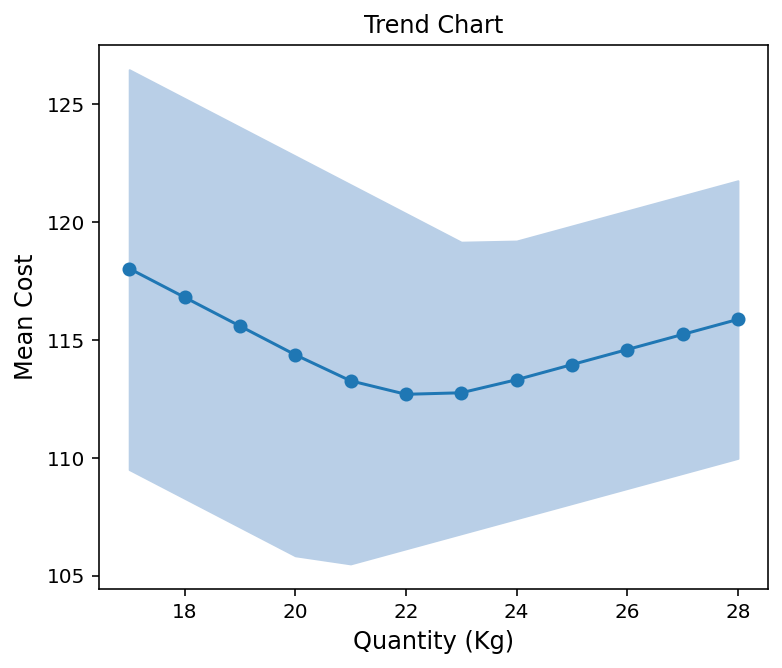

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot('Qty','AvgCost',data=results, linestyle='-', marker='o')
plt.xlabel('Quantity (Kg)', fontsize=12)
plt.ylabel('Mean Cost', fontsize=12)
plt.title("Trend Chart")
ax.fill_between('Qty','Pctl_05','Pctl_95',data=results,color="#b9cfe7", edgecolor="#b9cfe7")

## **Question 17** (Manually Graded) <font color="magenta">(2 points)</font>

Based on your dataframe and trend chart, what is the optimal amount of pork to pre-purchase. Why?

